QUESTION NO. 1:

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


loading dataset

In [3]:
import pandas as pd

# Load the dataset from the .data file
file_path = "/content/drive/MyDrive/ML_lab/parkinsons.data"  # Replace with the actual file path
parkinsons_data = pd.read_csv(file_path, delimiter=',')

# Display the first few rows of the dataset
print(parkinsons_data.head())


             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

Data preprocessing

missing values
As there are no missing values, no need handle it


In [4]:
# Check for missing values
missing_values = parkinsons_data.isnull().sum()

# Display columns with missing values, if any
print("Columns with missing values:")
print(missing_values[missing_values > 0])


Columns with missing values:
Series([], dtype: int64)


excluding name colmun as it is not a determining parameter of output.

In [5]:
# Exclude the 'name' column
parkinsons_data = parkinsons_data.drop(columns=['name'])

# Display the first few rows of the dataset to confirm
print(parkinsons_data.head())


   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0

Checking for categorical value


In [6]:
# Check data types of each column
data_types = parkinsons_data.dtypes

# Identify categorical variables
categorical_vars = data_types[data_types == 'object'].index.tolist()

# Display categorical variables
print("Categorical variables:")
print(categorical_vars)


Categorical variables:
[]


standardizing and normalizing data:

The numerical features are standardized using z-score standardization. Now, each feature will have mean 0 and standard devaiation 1.

In [7]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the numerical features (excluding the target variable)
num_features = parkinsons_data.drop(columns=['status'])
scaled_features = scaler.fit_transform(num_features)

# Create a DataFrame for the standardized features
scaled_df = pd.DataFrame(scaled_features, columns=num_features.columns)

# Add the target variable 'status' back to the DataFrame
scaled_df['status'] = parkinsons_data['status']

# Display the first few rows of the standardized dataset
print(scaled_df.head())


   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0    -0.829300     -0.436165     -0.952037        0.334914          0.749759   
1    -0.770972     -0.530974     -0.057721        0.715418          1.037674   
2    -0.909476     -0.723168     -0.109875        0.884991          1.325589   
3    -0.909622     -0.649092     -0.114229        0.775389          1.325589   
4    -0.925657     -0.606245     -0.130608        1.368893          1.901418   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0  0.132963  0.760800    0.131755      0.745985          0.739536  ...   
1  0.453892  1.276809    0.452684      1.681731          1.768464  ...   
2  0.720770  1.585687    0.721813      1.202693          1.027636  ...   
3  0.578885  1.284076    0.577677      1.340396          1.207698  ...   
4  1.095750  2.047187    1.096793      1.836448          1.552389  ...   

   Shimmer:DDA       NHR       HNR      RPDE       DFA   spread1   spread2

computing summary statistics and visualizing the distribution of the target variable

Summary Statistics:
       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   


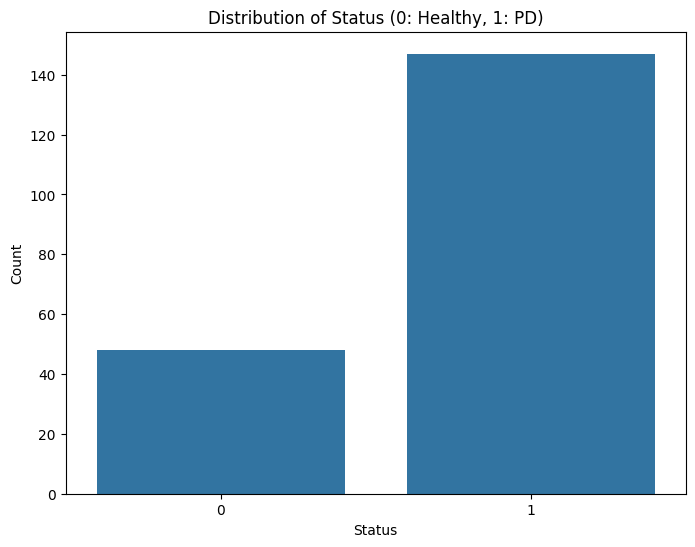

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for numerical features
summary_stats = parkinsons_data.describe()
print("Summary Statistics:")
print(summary_stats)

# Distribution of the target variable ('status')
plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=parkinsons_data)
plt.title("Distribution of Status (0: Healthy, 1: PD)")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()


visualizing the distribution of numerical features using histograms and exploring pairwise relationships using scatter plots.

<Figure size 1600x1200 with 0 Axes>

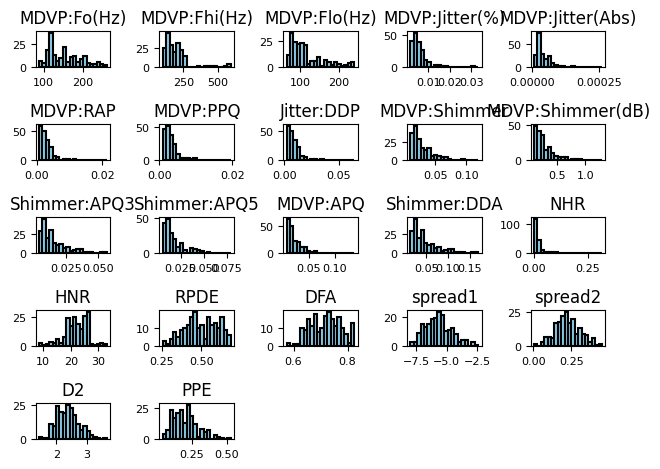

<Figure size 1600x1200 with 0 Axes>

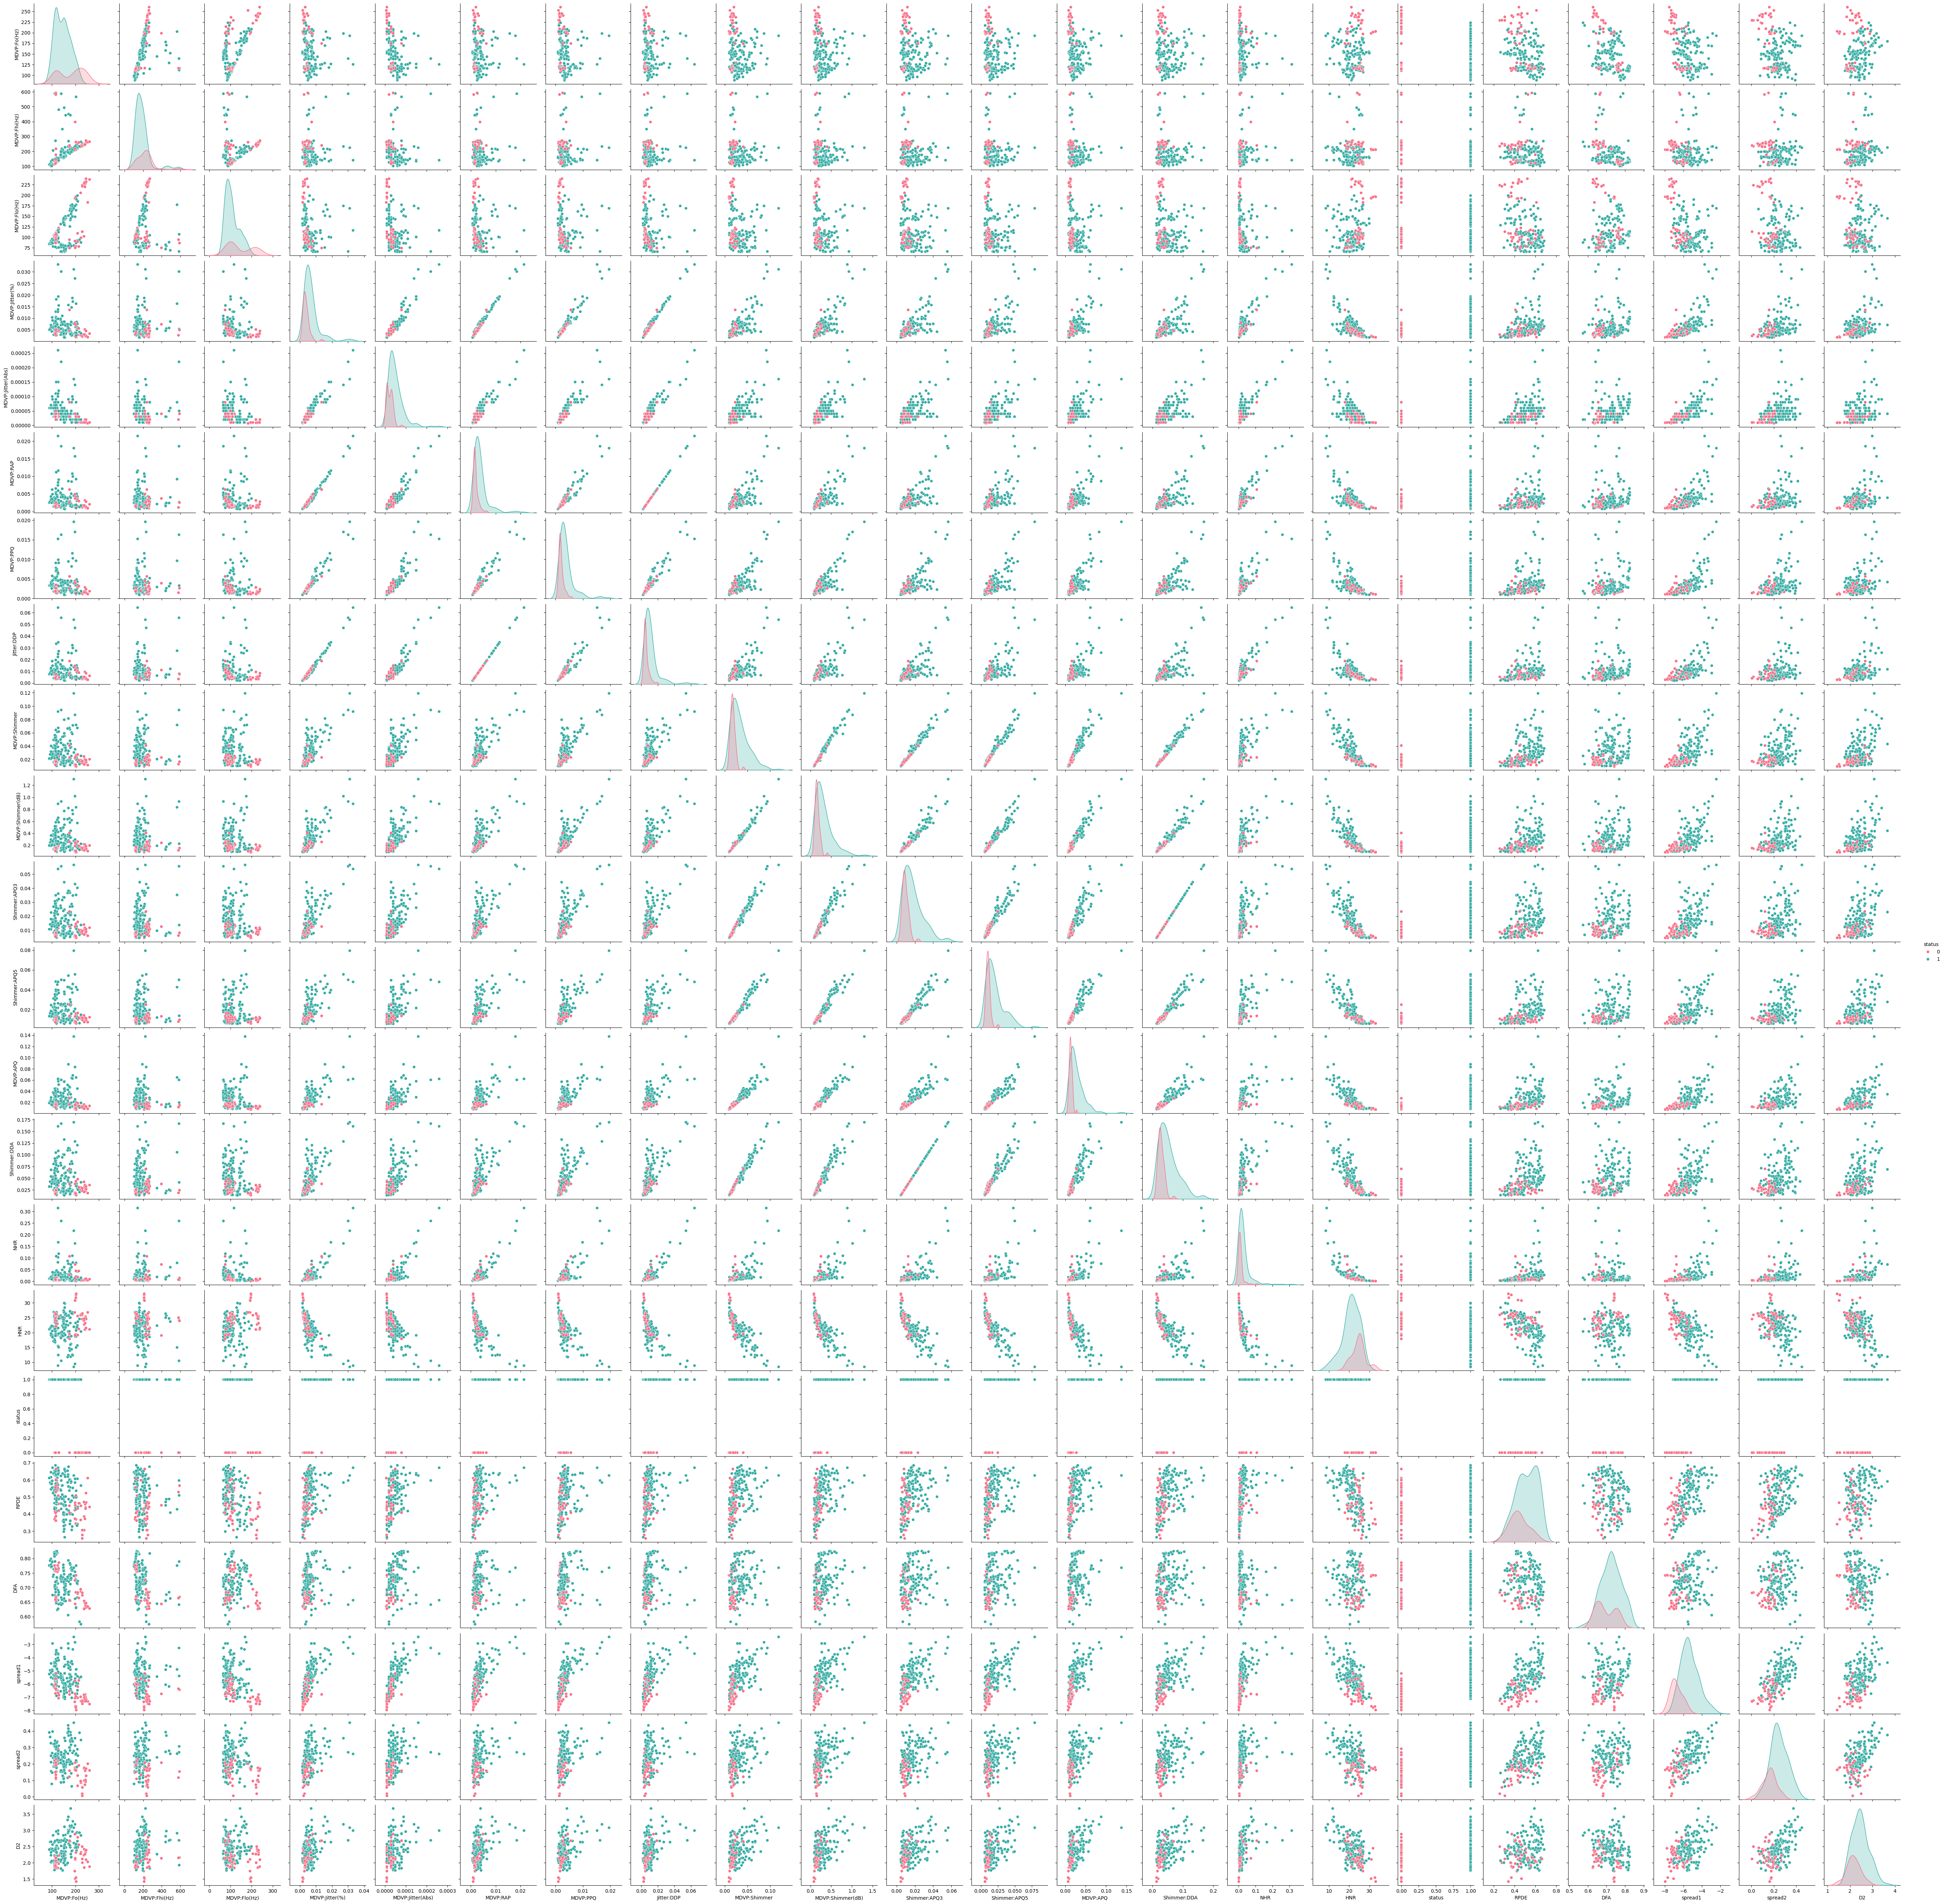

In [9]:
# Visualize the distribution of numerical features using histograms
plt.figure(figsize=(16, 12))
parkinsons_data.drop('status', axis=1).hist(bins=20, color='skyblue', edgecolor='black', linewidth=1.5, xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout()
plt.show()

# Explore pairwise relationships using scatter plots
plt.figure(figsize=(16, 12))
sns.pairplot(parkinsons_data, vars=parkinsons_data.columns[:-1], hue='status', palette='husl')
plt.show()


Feature Scaling: Scaling features to a similar range can help algorithms converge faster. Common methods include Min-Max Scaling and Standardization (Z-score normalization).

Feature Selection: Identifying and selecting the most relevant features can improve model performance and reduce overfitting. Techniques include correlation analysis, feature importance ranking, and model-based selection.

Feature Transformation: Transforming features can make them more suitable for modeling. Techniques include logarithmic transformation, polynomial features, and binning.

Encoding Categorical Variables: Converting categorical variables into numerical format that can be handled by machine learning algorithms. Techniques include one-hot encoding, label encoding, and target encoding.

Handling Missing Values: Dealing with missing data, either by imputation (replacing missing values with estimated ones) or removing rows or columns with missing values.

Noise Reduction: Identifying and filtering out noisy features that may introduce bias or reduce model performance.

Creating New Features: Generating new features based on domain knowledge or insights from the data can improve model performance. This could involve combining existing features, creating interaction terms, or extracting useful information from text or time-series data.

Dimensionality Reduction: Techniques like Principal Comp

answer all my questions and decide:
1. we have already done scaling right? standardizing using z-score?
2. as there are no missing values, handling missing values is not required, right?
3. as there are no categorical value, no numerical transformatin required, right?
4.


**Feature Engineering techniques**

calculate the correlation matrix for the features and visualize it using a heatmap to identify highly correlated features. High correlation between features can lead to multicollinearity, which may affect the performance of some machine learning models.

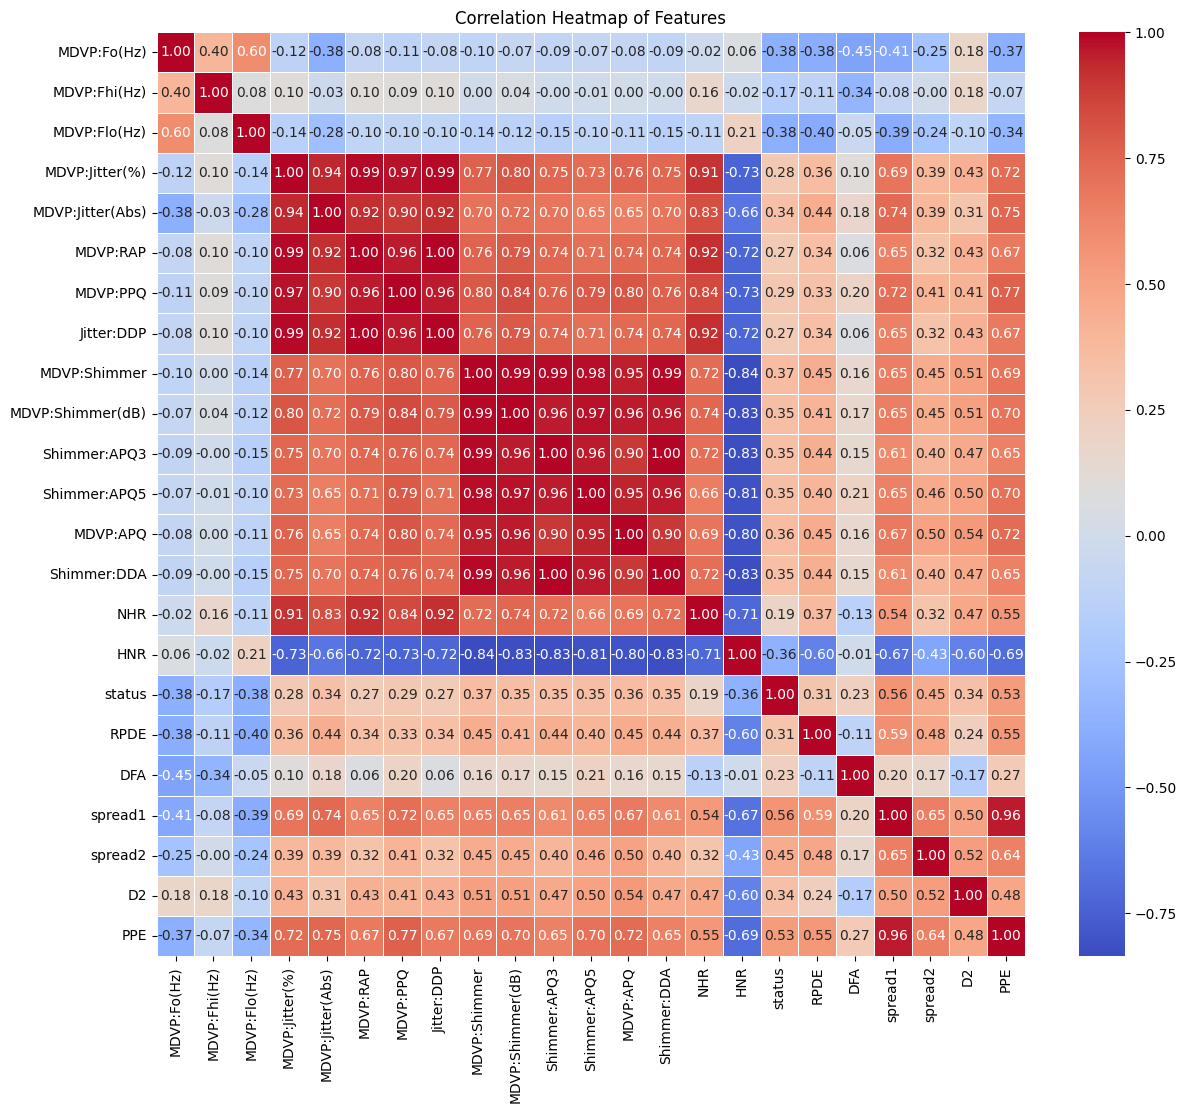

In [11]:

# Calculate correlation matrix
correlation_matrix = parkinsons_data.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


We'll use the train_test_split function from the sklearn.model_selection module to split the dataset.

In [12]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features (X) and target variable (y)
X = parkinsons_data.drop('status', axis=1)  # Features
y = parkinsons_data['status']  # Target variable

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 156
Testing set size: 39


We'll train the following classification models:

    1. Logistic Regression (LR)
    2. Perceptron Learning Algorithm (PLA)
    3. Multi-Layer Perceptron (MLP)
    4. k-Nearest Neighbors (KNN)
    5. Support Vector Machine (SVM)
    6. Naïve Bayes

importing the necessary libraries for building and evaluating the classification models.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


training each classification model one by one using the training data and evaluating their performance on the testing data

**1. LINEAR REGRESSION MODEL**

In [14]:
        # Initialize Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the testing set
lr_predictions = lr_model.predict(X_test)

# Evaluate the model
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Model Accuracy:", lr_accuracy)
print("Classification Report:")
print(classification_report(y_test, lr_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_predictions))


Logistic Regression Model Accuracy: 0.8974358974358975
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39

Confusion Matrix:
[[ 3  4]
 [ 0 32]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**2. PLA MODEL**

In [15]:
# Initialize Perceptron model
pla_model = Perceptron(random_state=42)

# Train the model
pla_model.fit(X_train, y_train)

# Predict on the testing set
pla_predictions = pla_model.predict(X_test)

# Evaluate the model
pla_accuracy = accuracy_score(y_test, pla_predictions)
print("Perceptron Model Accuracy:", pla_accuracy)
print("Classification Report:")
print(classification_report(y_test, pla_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, pla_predictions))


Perceptron Model Accuracy: 0.1794871794871795
Classification Report:
              precision    recall  f1-score   support

           0       0.18      1.00      0.30         7
           1       0.00      0.00      0.00        32

    accuracy                           0.18        39
   macro avg       0.09      0.50      0.15        39
weighted avg       0.03      0.18      0.05        39

Confusion Matrix:
[[ 7  0]
 [32  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**3. Multi-Layer Perceptron (MLP)**

In [16]:
# Initialize Multi-Layer Perceptron model
mlp_model = MLPClassifier(random_state=42)

# Train the model
mlp_model.fit(X_train, y_train)

# Predict on the testing set
mlp_predictions = mlp_model.predict(X_test)

# Evaluate the model
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
print("Multi-Layer Perceptron Model Accuracy:", mlp_accuracy)
print("Classification Report:")
print(classification_report(y_test, mlp_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, mlp_predictions))


Multi-Layer Perceptron Model Accuracy: 0.8461538461538461
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.88      0.94      0.91        32

    accuracy                           0.85        39
   macro avg       0.74      0.68      0.70        39
weighted avg       0.83      0.85      0.84        39

Confusion Matrix:
[[ 3  4]
 [ 2 30]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**4. k-Nearest Neighbors (KNN)**

In [17]:
# Initialize K-Nearest Neighbors model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the testing set
knn_predictions = knn_model.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("K-Nearest Neighbors Model Accuracy:", knn_accuracy)
print("Classification Report:")
print(classification_report(y_test, knn_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, knn_predictions))


K-Nearest Neighbors Model Accuracy: 0.8205128205128205
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.88      0.91      0.89        32

    accuracy                           0.82        39
   macro avg       0.69      0.67      0.68        39
weighted avg       0.81      0.82      0.81        39

Confusion Matrix:
[[ 3  4]
 [ 3 29]]


The K-Nearest Neighbors (KNN) model achieved an accuracy of approximately 82.05%. It performed reasonably well in classifying both the positive (Parkinson's disease) and negative (healthy) classes, with a precision of 50% and 88% respectively, and recall of 43% and 91% respectively.

From the confusion matrix, we can see that the model correctly classified 3 out of 7 instances of the negative class and 29 out of 32 instances of the positive class.



**5. Support Vector Machine (SVM)**

In [18]:
# Initialize Support Vector Machine model
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the testing set
svm_predictions = svm_model.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Support Vector Machine Model Accuracy:", svm_accuracy)
print("Classification Report:")
print(classification_report(y_test, svm_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))


Support Vector Machine Model Accuracy: 0.8461538461538461
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.86      0.97      0.91        32

    accuracy                           0.85        39
   macro avg       0.76      0.63      0.66        39
weighted avg       0.83      0.85      0.82        39

Confusion Matrix:
[[ 2  5]
 [ 1 31]]


The Support Vector Machine (SVM) model achieved an accuracy of approximately 84.62%. It performed reasonably well in classifying the positive (Parkinson's disease) class, with a precision of 86% and recall of 97%. However, its performance in classifying the negative (healthy) class was lower, with a precision of 67% and recall of 29%.

From the confusion matrix, we can see that the model correctly classified 2 out of 7 instances of the negative class and 31 out of 32 instances of the positive class.

**6. Naïve Bayes**

In [19]:
# Initialize Naïve Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Predict on the testing set
nb_predictions = nb_model.predict(X_test)

# Evaluate the model
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naïve Bayes Model Accuracy:", nb_accuracy)
print("Classification Report:")
print(classification_report(y_test, nb_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, nb_predictions))


Naïve Bayes Model Accuracy: 0.6923076923076923
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.71      0.45         7
           1       0.92      0.69      0.79        32

    accuracy                           0.69        39
   macro avg       0.62      0.70      0.62        39
weighted avg       0.81      0.69      0.73        39

Confusion Matrix:
[[ 5  2]
 [10 22]]


The Naïve Bayes model achieved an accuracy of approximately 69.23%. It performed reasonably well in classifying the positive (Parkinson's disease) class, with a precision of 92% and recall of 69%. However, its performance in classifying the negative (healthy) class was lower, with a precision of 33% and recall of 71%.

From the confusion matrix, we can see that the model correctly classified 5 out of 7 instances of the negative class and 22 out of 32 instances of the positive class.



Inference:

  Logistic Regression and Support Vector Machine models demonstrated relatively balanced performance in terms of precision and recall for both classes.

  Multi-Layer Perceptron showed slightly lower precision for the negative class but still achieved good overall accuracy.
  
  Naïve Bayes showed lower precision for the negative class but higher precision for the positive class compared to the other models.

Overall, Logistic Regression and Support Vector Machine models seem to be the most suitable for this dataset based on their balanced performance across both classes.

ROC curve for testing dataset using the above built models

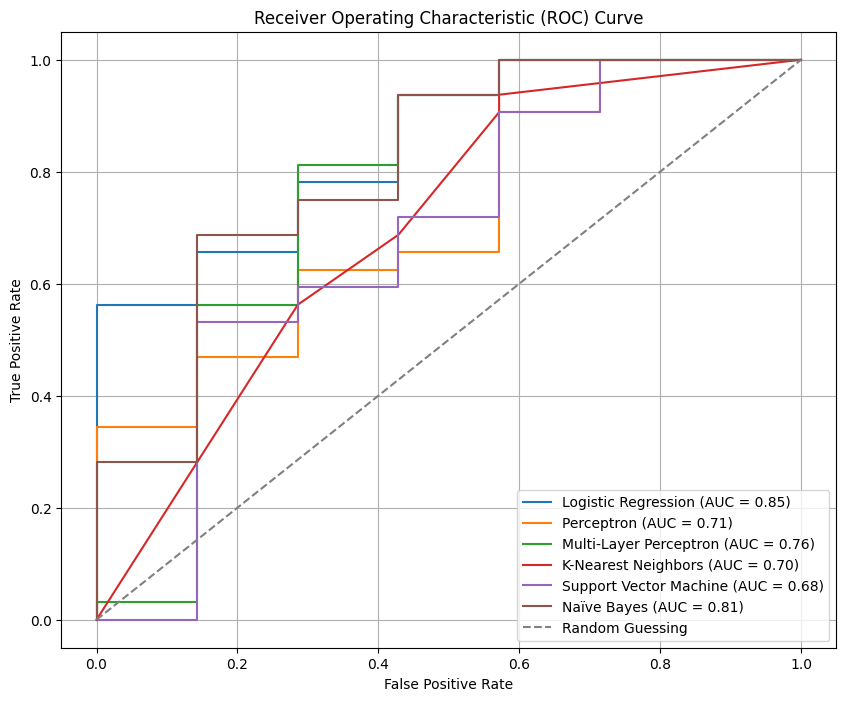

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize models and their predictions
models = [lr_model, pla_model, mlp_model, knn_model, svm_model, nb_model]
model_names = ['Logistic Regression', 'Perceptron', 'Multi-Layer Perceptron',
               'K-Nearest Neighbors', 'Support Vector Machine', 'Naïve Bayes']
predictions = [lr_predictions, pla_predictions, mlp_predictions,
               knn_predictions, svm_predictions, nb_predictions]

# Plot ROC curve for each model
plt.figure(figsize=(10, 8))
for model, name, pred in zip(models, model_names, predictions):
    # Calculate predicted probabilities
    if hasattr(model, "predict_proba"):
        prob = model.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, prob)
    auc = roc_auc_score(y_test, prob)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

# Plot ROC curve for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

# Set plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)

# Show plot
plt.show()


    Logistic Regression (LR): AUC = 0.85
        The LR model has a relatively high AUC value, indicating good discrimination between positive and negative classes.

    Perceptron: AUC = 0.71
        The Perceptron model has a lower AUC value compared to LR, suggesting that its discriminatory power is not as strong.

    Multi-Layer Perceptron (MLP): AUC = 0.76
        The MLP model has a moderate AUC value, indicating moderate discrimination performance.

    K-Nearest Neighbors (KNN): AUC = 0.70
        The KNN model has a slightly lower AUC value compared to MLP, suggesting slightly weaker discrimination performance.

    Support Vector Machine (SVM): AUC = 0.68
        The SVM model has a relatively low AUC value, indicating weaker discrimination performance compared to other models.

    Naïve Bayes: AUC = 0.81
        The Naïve Bayes model has a relatively high AUC value, suggesting good discrimination performance similar to LR.

Based on these AUC values, Logistic Regression and Naïve Bayes appear to be the top-performing models for this dataset in terms of discrimination between PD affected and healthy individuals. However, it's essential to consider other factors such as model interpretability, computational efficiency, and potential overfitting when selecting the best model for practical use.

ROC curve for training dataset using the above built models

Logistic Regression Training AUC: 0.91
Perceptron Training AUC: 0.71
Multi-Layer Perceptron Training AUC: 0.86
K-Nearest Neighbors Training AUC: 0.96
Support Vector Machine Training AUC: 0.78
Naïve Bayes Training AUC: 0.88


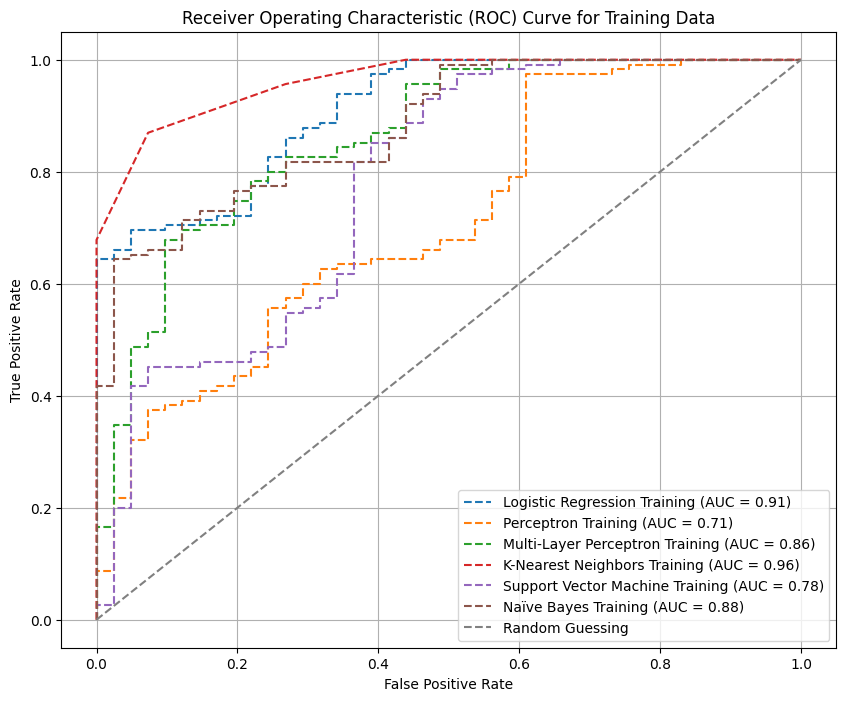

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize models and their predictions
models = [lr_model, pla_model, mlp_model, knn_model, svm_model, nb_model]
model_names = ['Logistic Regression', 'Perceptron', 'Multi-Layer Perceptron',
               'K-Nearest Neighbors', 'Support Vector Machine', 'Naïve Bayes']
predictions = [lr_predictions, pla_predictions, mlp_predictions,
               knn_predictions, svm_predictions, nb_predictions]

# Plot ROC curve for each model
plt.figure(figsize=(10, 8))
for model, name, pred in zip(models, model_names, predictions):
    # Calculate predicted probabilities for training data
    if hasattr(model, "predict_proba"):
        prob_train = model.predict_proba(X_train)[:, 1]
    else:  # use decision function
        prob_train = model.decision_function(X_train)

    fpr_train, tpr_train, _ = roc_curve(y_train, prob_train)
    auc_train = roc_auc_score(y_train, prob_train)

    # Plot ROC curve for training data
    plt.plot(fpr_train, tpr_train, linestyle='--', label=f'{name} Training (AUC = {auc_train:.2f})')

    # Print AUC value for training set
    print(f'{name} Training AUC: {auc_train:.2f}')

# Plot ROC curve for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

# Set plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Training Data')
plt.legend(loc='lower right')
plt.grid(True)

# Show plot
plt.show()


Now that we have both the AUC values for the training and testing sets for each model, we can compare them to assess overfitting.

Here are the AUC values for the training set:
- Logistic Regression: AUC_Train = 0.91
- Perceptron: AUC_Train = 0.71
- Multi-Layer Perceptron: AUC_Train = 0.86
- K-Nearest Neighbors: AUC_Train = 0.96
- Support Vector Machine: AUC_Train = 0.78
- Naïve Bayes: AUC_Train = 0.88

And here are the AUC values for the testing set :
- Logistic Regression: AUC_Test = 0.85
- Perceptron: AUC_Test = 0.71
- Multi-Layer Perceptron: AUC_Test = 0.76
- K-Nearest Neighbors: AUC_Test = 0.70
- Support Vector Machine: AUC_Test = 0.68
- Naïve Bayes: AUC_Test = 0.81

To assess overfitting, we can compare the differences between the AUC values for the training and testing sets for each model. If the difference is large, it may indicate overfitting. Let's calculate these differences.

Here are the differences between the AUC values for the training and testing sets for each model:

- Logistic Regression: ΔAUC = AUC_Train - AUC_Test = 0.91 - 0.85 = 0.06
- Perceptron: ΔAUC = AUC_Train - AUC_Test = 0.71 - 0.71 = 0
- Multi-Layer Perceptron: ΔAUC = AUC_Train - AUC_Test = 0.86 - 0.76 = 0.10
- K-Nearest Neighbors: ΔAUC = AUC_Train - AUC_Test = 0.96 - 0.70 = 0.26
- Support Vector Machine: ΔAUC = AUC_Train - AUC_Test = 0.78 - 0.68 = 0.10
- Naïve Bayes: ΔAUC = AUC_Train - AUC_Test = 0.88 - 0.81 = 0.07

From the differences calculated:
- Perceptron and Naïve Bayes models have minimal difference between training and testing AUC, suggesting less overfitting.
- Logistic Regression, Multi-Layer Perceptron, and Support Vector Machine models have moderate differences.
- K-Nearest Neighbors model has the largest difference, indicating potential overfitting.

These differences provide insights into the generalization performance of each model. Models with smaller differences between training and testing AUC are likely to generalize better to unseen data.

**CLUSTERING**

  We remove the 'status' columns from the dataset as it is not needed for clustering.
  
  We standardize the features using StandardScaler to ensure that all features have the same scale.
  
  We perform clustering using K-means algorithm with 2 clusters. You can adjust the number of clusters based on your requirements.
  
  We add the cluster labels to the original dataset.
  
  We analyze the distribution of data points across clusters.
  
  Optionally, you can visualize the clusters using dimensionality reduction techniques.
  
  Optionally, you can measure the performance of the clustering model using evaluation metrics.

In [26]:
# Step 10: Ignore the class label and perform clustering task
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Load the dataset
# Assuming you have already loaded the dataset into a DataFrame called 'data'

# Remove the 'name' and 'status' columns as they are not needed for clustering
X_clustering = parkinsons_data .drop(['status'], axis=1)

# Standardize the features
scaler = StandardScaler()
X_clustering_scaled = scaler.fit_transform(X_clustering)

# Perform clustering using K-means
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_clustering_scaled)

# Add the cluster labels to the original dataset
parkinsons_data ['cluster'] = clusters

# Analyze the clusters
cluster_counts = parkinsons_data ['cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

# Visualize the clusters (optional)
# You can use dimensionality reduction techniques like PCA or t-SNE to visualize the clusters in 2D or 3D.

# Measure the performance of the clustering model (optional)
# If you have ground truth labels, you can use metrics like adjusted Rand index, silhouette score, etc., to evaluate the clustering performance.

# You can experiment with other clustering algorithms such as hierarchical clustering, DBSCAN, etc., and compare their performances.


Cluster Counts:
cluster
1    155
0     40
Name: count, dtype: int64


The output shows that there are 40 data points in Cluster 0 and 155 data points in Cluster 1. This distribution indicates that the data points are not evenly distributed across the clusters, suggesting potential differences in the characteristics of the data points within each cluster.